<a href="https://colab.research.google.com/github/in3der/DataAnalysis/blob/main/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EB%B0%8F%ED%99%9C%EC%9A%A9%5D%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**의사 결정트리 ID3 과정 연습해보기**

- 데이터 로딩
> 교재 예제에서 보았던 age, income, student, credit을 바탕으로 컴퓨터 구매여부 (class_buy_computer)를 예측하기 위한 데이터

In [ ]:
import pandas as pd
import numpy as np

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data

- 학습에 필요 없는 열 제거
> 첫 번째 열인 RID는 의미 없는 인덱스 번호이므로 제거

In [ ]:
pd_data = pd_data.drop("RID",axis=1)

- 정보이득 함수 만들기: y값의 클래스를 기준으로 엔트로피 연산을 실시
> class_buys_computer가 yes인 경우와 no인 경우로 나눠서 연산

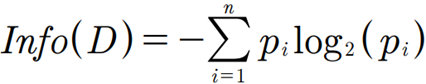

In [ ]:
def get_info(df):
    buy = df.loc[df["class_buys_computer"]=="yes"]
    not_buy = df.loc[df["class_buys_computer"]=="no"]
    x = np.array([len(buy)/len(df),len(not_buy)/len(df)])
    y = np.log2(x[x!=0])

    info_all = - sum(x[x!=0] * y)
    return info_all

In [ ]:
get_info(pd_data)

- 속성별 정보 이득률 구하기
> 각 속성들의 클래스를 기준으로 데이터를 추출한 후 정보 이득을 산출

In [ ]:
youth = pd_data.loc[pd_data['age'] == "youth"]
senior = pd_data.loc[pd_data['age'] == "senior"]
middle_aged = pd_data.loc[pd_data['age'] == "middle_aged"]

In [ ]:
youth

> **age** 속성을 사용해서 분할 했을 때, youth 클래스에만 해당하는 정보이득

In [ ]:
get_info(youth)

> **age** 속성을 사용해서 분할 했을 때, senior 클래스에만 해당하는 정보이득

In [ ]:
get_info(senior)

> **age** 속성을 사용해서 분할 했을 때, middle_aged 클래스에만 해당하는 정보이득

In [ ]:
get_info(middle_aged)

> **age** 속성의 클래스 항목을 확인하는 방법

In [ ]:
pd_data["age"]

> unique 함수는 값이 중복되지 않게 리스트를 반환한다.

In [ ]:
pd_data["age"].unique()

- 자동으로 속성별 정보 이득 연산하기
> **age** 속성의 클래스 항목들에 대해서 정보이득을 구함

In [ ]:
attribute_values = pd_data["age"].unique()

for value in attribute_values:
    split_df = pd_data.loc[pd_data["age"] == value]
    print(value, get_info(split_df))

 > DataFrame (df)의 속성 (attribute_name)의 각 클래스 항목에 대해서 정보이득을 구한 이후에 개수에 따른 **가중 평균**을 구함.

In [ ]:
def get_attribute_info(df, attribute_name):

    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = df.loc[pd_data[attribute_name] == value]
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))

    return sum(get_infos)

In [ ]:
get_attribute_info(pd_data, "age")

- 정보 이득 계산하기
> 전체 데이터 대비 각각의 속성 데이터를 분리하여 계산

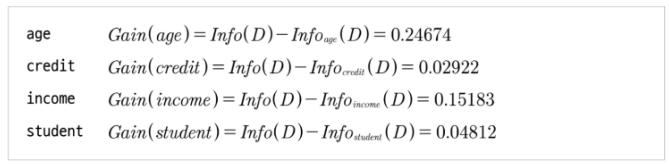

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, "age")

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, "income")

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, "student")

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, "credit_rating")

- 정보 이득이 가장 큰 age 속성값을 기준으로 의사결정트리 가지를 생성
> 가지 생성을 재귀적으로 수행함


In [ ]:
youth = pd_data.loc[pd_data['age'] == "youth"]
get_info(youth)

In [ ]:
youth

In [ ]:
get_attribute_info(youth, "income")

In [ ]:
get_info(youth) - get_attribute_info(youth, "student")

In [ ]:
get_info(youth) - get_attribute_info(youth, "credit_rating")


> 정보이득이 가장 큰 student가 다음 분기를 위한 속성으로 사용

> 이러한 일련의 과정을 재귀적으로 수행하는 알고리즘 구현의 문제는 "자료구조"와 "알고리즘" 기반 이해가 필요

**사이킷런으로 의사결정트리 구현하기**

- 데이터 불러오기

In [ ]:
import pandas as pd

!gdown https://drive.google.com/uc?id=1xiSgJZ8iyWruHlQG_n71naMb-uigxfpF
!gdown https://drive.google.com/uc?id=1y9xrKsP6JQrIHYNd0NNVg2-4tNyu7WZl
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

all_df = train_df.append(test_df).set_index('PassengerId')

> 전처리를 위해서 train_id와 test_id를 하나로 합쳐서 사용한다.

> 전처리 후에 추후 다시 training set과 test set을 분리하기 위해서 PassengerId 속성 값을 기억해 놓는다.

In [ ]:
train_df

- 데이터 전처리
> 데이터를 코드화시키고 결측치를 채우기

In [ ]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

> 성별은 이진 값을 가지므로 "male"을 0으로 "female"을 1로 변경한다.

> 나이 값의 빈칸의 값을 각 클래스 (Pclass)의 평균값으로 채운다.

In [ ]:
all_df[200:300]

> Cabin 속성은 NaN, 또는 짐 형태와 번호 (ex, C22, B60)가 나열되어있다.

> 따라서 NaN일 경우에는 0 (str이 아닐경우), 1개 이상일 경우에는 짐 개수를 입력으로 사용한다.

In [ ]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)

In [ ]:
all_df[200:300]

> 이름에 있는 명칭 (Mrs, Ms, Mr, Miss, Master, Dr, Rev, Col)을 이용하여 사회적 지위 정보를 정리하여 새로운 열에 저장한다.

In [ ]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs"
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [ ]:
all_df["social_status"].value_counts()

In [ ]:
all_df

> 사용하지 않을 데이터를 삭제한다. (Embarked 승선 하지 않은 사람을 삭제 한다)

In [ ]:
all_df[all_df["Embarked"].isnull()]

In [ ]:
all_df = all_df.drop([62,830])
train_id = np.delete(train_id, [62-1,830-1])

In [ ]:
all_df[all_df["Embarked"].isnull()]

> 빈 데이터는 적당한 값 채운다.

In [ ]:
all_df[all_df["Fare"].isnull()]

In [ ]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

In [ ]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

> 짐의 형태에 따라 생존 여부가 달라질 수 있다고 가정하고 전처리 작업을 진행 (실험적인 검증이 필요)

In [ ]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "None")

In [ ]:
all_df["cabin_type"].value_counts()

> 불필요하다고 생각하는 속성 (열)을 삭제한다.

In [ ]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

> 결과값 속성 (종속변수)의 값은 별도로 추출하고, 삭제한다.

In [ ]:
Y = all_df["Survived"]
del all_df["Survived"]

- 원핫인코딩과 스케일링
> 데이터를 원핫으로 변경 후 넘파이 배열로 변경

In [ ]:
X_df = pd.get_dummies(all_df)
X = X_df.values

X_df.keys()

> 학습데이터와 시험데이터를 다시 분리한다.

In [ ]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]
Y_train = Y[:len(train_id)]
Y_test = Y[len(train_id):]

In [ ]:
Y_train, Y_test

> 학습데이터에서 Scaling을 수행하고, 학습/시험 데이터에 적용해준다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X_train)

In [ ]:
X_train, X_test

In [ ]:
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

In [ ]:
X_train, X_test

- 학습 실행하기

주요 하이퍼 매개변수

- **criterion** : [“gini”, “entropy”] : 지니 지수를 기준으로 나눌지, 정보 이득을 기준으로 나눌지 지정
- **max_depth** : int : 트리의 깊이를 지정
- **min_samples_leaf** : int or float : 마지막 노드의 최소 데이터의 개수를 지정 (int는 데이터의 개수, float는 전체 데이터에서의 비율)

> 마지막 노드의 개수 (min_samples_leaf) 개수를 조정하여 가지치기를 실시하고자 한다.

- 교차 검증 (cross_val_score)

> N-fold cross validation

> N = 5 예제

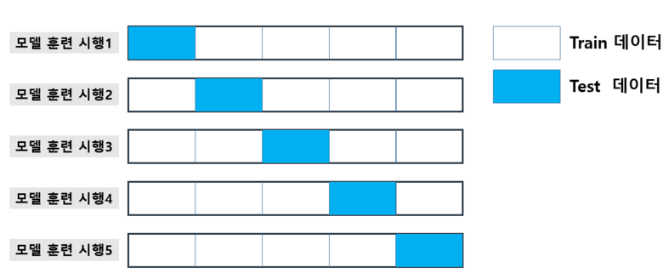

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test_accuracy = []
train_accuracy = []
for idx in range(3, 20):
    dt = DecisionTreeClassifier(min_samples_leaf=idx)
    acc = cross_val_score(dt, X_train, y, scoring="accuracy", cv=5).mean()
    train_accuracy.append(accuracy_score(dt.fit(X_train, Y_train).predict(X_train), Y_train))
    test_accuracy.append(acc)

result = pd.DataFrame(train_accuracy, index=range(3,20), columns=["train"])
result["test"] = test_accuracy

result.plot()

> test 데이터셋의 정확성은 11에서 가장 높았다가 계속 떨어짐

> 의사결정트리의 경우 마지막 노드의 데이터 개수가 적으면 적을수록 과대적합이 발생

- 의사결정트리 시각화하기

> 의사결정트리는 데이터 분석가에게 어떤 피쳐가 가장 중요한지를 보여줌

> 하나의 노드를 기준으로 어떤 속성에 대해서 어떤 기준으로 가지가 발생했는지, 각 가지마다 데이터의 개수가 어떻게 나누어지는지 확인 가능

In [ ]:
import pydotplus
from six import StringIO
from sklearn import tree

column_names = X_df.columns

dot_data = StringIO()
tree.export_graphviz(dt, out_file=dot_data, feature_names=column_names)
graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("titanic.png")
from IPython.core.display import Image
Image(filename='titanic.png')